In [1]:
# Make sure to run: pip install matplotlib numpy scipy (if you don't have them already)

import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as sio

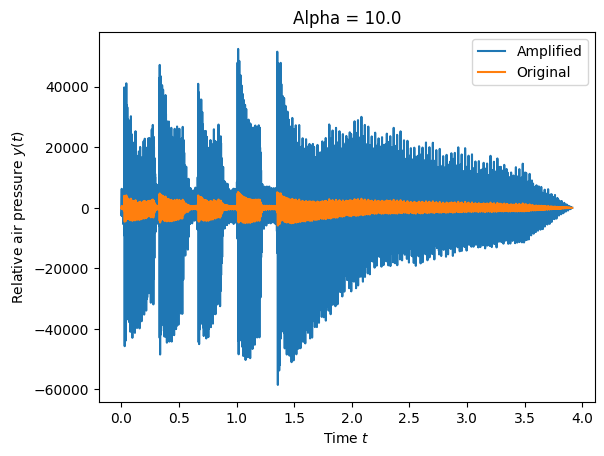

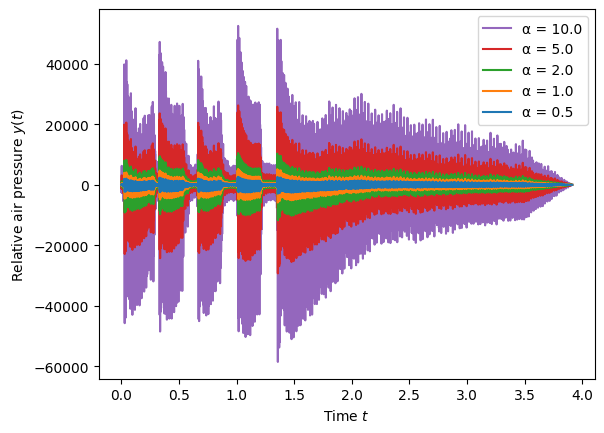

Problem 4 Part A Answer Summary
Above is the Graph for Problem 4 Part A
Linear Scaling with differing alpha values


In [63]:
# Amplifier gain.
alpha = 10.0

# A function to amplify signal x (signal processing system).
def amplify(x, alpha):
	return alpha * x

# Guitar_clean.wav copyright
# Original author: LG downloaded from freesound.org,
# Original file name: Guitar clean rif.wav
wav = sio.read("guitar_clean.wav")										# Read wav file (read only one stereo channel).
sample_rate = wav[0]													

x = wav[1][:, 0]														# Read only one stereo channel.
time_vec = np.arange(len(x)) / float(sample_rate)						# Create time vector (independent variable).
plt.plot(time_vec, amplify(x, alpha), label="Amplified")				# Plot original and amplified.
plt.plot(time_vec, x, label="Original")	
plt.title("Alpha = 10.0")
plt.legend()
plt.xlabel("Time $t$")
plt.ylabel("Relative air pressure $y(t)$")
plt.show()



# Amplify signal.
out = amplify(x, alpha)

# Scale maximum absolute amplitude to 0.9,
# because 1.0 is the maximum allowed by the .wav file format.
# Note that this will not allow you to hear the audio signal amplitude increasing.
out = 0.9 * out / np.max(np.abs(out))

# Write compressed output to wav file.
# Patch from Jostein and Adrian (cast to 32 bit float).
sio.write("guitar_amp.wav", sample_rate, np.array(out, dtype=np.float32))



# Add Code from here
alpha0_5 = 0.5
alpha1 = 1.0
alpha2 = 2.0
alpha5 = 5.0

Alpha = 0.5
plt.plot(time_vec, amplify(x, alpha), label="\u03b1 = 10.0", color="tab:purple")
plt.plot(time_vec, amplify(x, alpha5), label="\u03b1 = 5.0", color="tab:red")
plt.plot(time_vec, amplify(x, alpha2), label="\u03b1 = 2.0", color="tab:green")
plt.plot(time_vec, amplify(x, alpha1), label="\u03b1 = 1.0", color="tab:orange")
plt.plot(time_vec, amplify(x, alpha0_5), label="\u03b1 = 0.5", color="tab:blue")
plt.legend()
plt.xlabel("Time $t$")
plt.ylabel("Relative air pressure $y(t)$")
plt.show()


print("Problem 4 Part A Answer Summary")
print("Above is the Graph for Problem 4 Part A")
print("Linear Scaling with differing alpha values")

In [ ]:
# Problem 4 Part B
sumx = 0.0
sumax = 0.0

# Power of x
for n in x:
    sumx += float((abs(n)**2))
sumx /= len(x)

# Power of ax
for n in amplify(x, alpha):
    sumax += float((abs(n)**2))
sumax /= len(x)

print("Problem 4 Part B Answer Summary")
print(f"Power of x[n] = {sumx}")
print(f"Power of \u03b1x[n] = {sumax}")
print(f"The Power of the Amplified Signal is much higher than the unamplified. Here the \u03b1 value is {alpha} .")

Problem 4 Part B Answer Summary
Power of x[n] = 1475.3126517086962
Power of αx[n] = 98839734.97627696
The Power o0f the Amplified Signal is much higher than the un amplified. Here the α value is 10.0 .


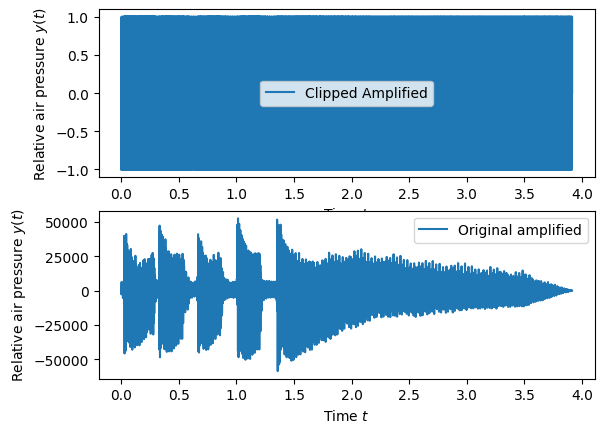

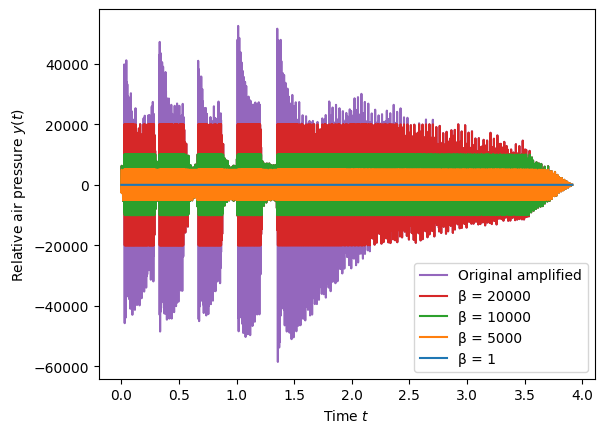

Problem 4 Part C Answer Summary
Above is the graph with the differing values of β
Clipping literally limits the absolute value of the signal to the β value


In [65]:
# The nonlinear clipping 
beta = 1
beta5 = 5000
beta10 = 10000
beta20 = 20000

def hard_clip(x, beta):
    return np.clip(x, -beta, beta)

amplifiedx = amplify(x,alpha)
out_clipped = hard_clip(amplifiedx, beta)
out_clipped5 = hard_clip(amplifiedx, beta5)
out_clipped10 = hard_clip(amplifiedx, beta10)
out_clipped20 = hard_clip(amplifiedx, beta20)

fig, (ax0, ax1) = plt.subplots(2, 1)
ax0.plot(time_vec, out_clipped, label="Clipped Amplified")
ax1.plot(time_vec, amplify(x,alpha), label="Original amplified")
ax0.legend()
ax1.legend()
ax0.set_xlabel("Time $t$")
ax1.set_xlabel("Time $t$")
ax0.set_ylabel("Relative air pressure $y(t)$")
ax1.set_ylabel("Relative air pressure $y(t)$")
plt.show()

plt.plot(time_vec, amplifiedx, label="Original amplified", color="tab:purple")
plt.plot(time_vec, out_clipped20, label="\u03b2 = 20000", color="tab:red")
plt.plot(time_vec, out_clipped10, label="\u03b2 = 10000", color="tab:green")
plt.plot(time_vec, out_clipped5, label="\u03b2 = 5000", color="tab:orange")
plt.plot(time_vec, out_clipped, label="\u03b2 = 1", color="tab:blue")
plt.legend()
plt.xlabel("Time $t$")
plt.ylabel("Relative air pressure $y(t)$")
plt.show()



print("Problem 4 Part C Answer Summary")
print("Above is the graph with the differing values of \u03b2")
print("Clipping literally limits the absolute value of the signal to the \u03b2 value")

In [89]:
print("Problem 4 Part D Answer Summary")
print("\nThe transformation y(t)=\u03b1x(t) is both linear and Time invariant.")
print("\tLinearity")
print("\t\tT{(x\N{SUBSCRIPT ONE} + x\N{SUBSCRIPT TWO}}(t) = \u03b1x\N{SUBSCRIPT ONE}(t) + \u03b1x\N{SUBSCRIPT TWO}(t) = T{x\N{SUBSCRIPT ONE}(t)} + T{x\N{SUBSCRIPT TWO}(t)}")
print("\tTime-Invariance")
print("\t\tT{x(t - t\N{SUBSCRIPT ZERO})} = \u03b1x(t - t\N{SUBSCRIPT ZERO}) = T{x}(t - t\N{SUBSCRIPT ZERO})")
print("\nThe transformation clipping is not linear but is Time invariant.")
print("\tLinearity")
print("\t\tThe Problem here is that when two clipped Signals add, they will add to 2 * \u03b2 while adding before clipping will limit to  just 1 * \u03b2")
print("\tTime-Invariance")
print("\t\tT{x(t - t\N{SUBSCRIPT ZERO})} = Clipped x(t - t\N{SUBSCRIPT ZERO}) = T{x}(t - t\N{SUBSCRIPT ZERO})")

Problem 4 Part D Answer Summary

The transformation y(t)=αx(t) is both linear and Time invariant.
	Linearity
		T{(x₁ + x₂}(t) = αx₁(t) + αx₂(t) = T{x₁(t)} + T{x₂(t)}
	Time-Invariance
		T{x(t - t₀)} = αx(t - t₀) = T{x}(t - t₀)

The transformation clipping is not linear but is Time invariant.
	Linearity
		The Problem here is that when two clipped Signals add, they will add to 2 * β while adding before clipping will limit to  just 1 * β
	Time-Invariance
		T{x(t - t₀)} = Clipped x(t - t₀) = T{x}(t - t₀)
